In [29]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.color import rgb2gray #Transform rgb to gray 

In [28]:
#!pip3 install cv2
#!pip install --matplotlib
#pip install matplotlib
!pip install --scikit-image


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --scikit-image


In [5]:
#install open CV for image processing work 
!pip install opencv-python

     |████████████████████████████████| 51.6MB 13.1MB/s eta 0:00:01


In [9]:
#import CV2 for image processing 
import cv2

In [10]:
## Get working directory
os.getcwd()

'/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project'

In [11]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project')

In [287]:
import glob
#import abies concolor images 
abies = []
for img in glob.glob("/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project/abies_concolor/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,(200,200))
    abies.append(n)



In [14]:
#bring in labels 
label = pd.read_csv("labels.csv", sep=',',header=0)



In [15]:
labels = np.array(label) #conver to numpy array 

In [16]:
len(abies)

51

#display images 
cv2.imshow('Test image',cv_img[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

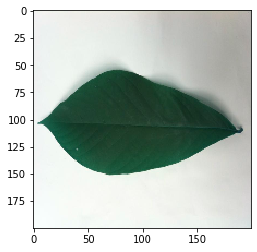

In [22]:
#Another quicker method to display images 
plt.imshow(asimina_triloba[4], cmap='gray')
#acer_ginnala
#acer_palmatum
#acer_rubrum
#asimina_triloba
#abies

In [241]:
#import acer_ginnala  images 
acer_ginnala = []
for img in glob.glob("/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project/acer_ginnala/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,(200,200))
    acer_ginnala.append(n)


In [272]:
#import acer_palmatum images 
acer_palmatum = []
for img in glob.glob("/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project/acer_palmatum/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,(200,200))
    acer_palmatum.append(n)


In [194]:
#import acer_rubrum images 
acer_rubrum = []
for img in glob.glob("/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project/acer_rubrum/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,(200,200))
    acer_rubrum.append(n)


In [40]:
#import asimina_triloba images 
asimina_triloba = []
for img in glob.glob("/Users/Sebastian/Graduate School/CSC 481 Digital Image Processing/Project/asimina_triloba/*.jpg"):
    n= cv2.imread(img)
    n=cv2.resize(n,(200,200))
    asimina_triloba.append(n)


In [23]:
####Now lets do some binary Segmenation for our basis for the project
#Grab all image sets and set into new list 
acer_ginnala_G = acer_ginnala
acer_palmatum_G = acer_palmatum
acer_rubrum_G = acer_rubrum
asimina_triloba_G = asimina_triloba
abies_G = abies


#w1 = numpy.copy(w2)

In [141]:
#Another quicker method to display images 
#plt.imshow(acer_ginnala_G[4], cmap='gray')
#acer_ginnala
#acer_palmatum
#acer_rubrum
#asimina_triloba
#abies
#len(acer_ginnala_G)
#gray = rgb2gray(acer_ginnala_G[6])
#plt.imshow(gray, cmap='gray')
#w1 = numpy.copy(w2)


In [30]:
#Convert all the images into grayscale 
#acer_ginnala
#acer_palmatum
#acer_rubrum
#asimina_triloba
#abies
#gray = rgb2gray(acer_ginnala_G[1]) # Use this function to convert to grayscale 
#plt.imshow(gray, cmap='gray')

z = len(acer_ginnala_G)
x = 0
while x < z:
    y = rgb2gray(acer_ginnala_G[x])
    acer_ginnala_G[x] = y
    x = x+1

z = len(acer_palmatum_G)
x = 0
while x < z:
    y = rgb2gray(acer_palmatum_G[x])
    acer_palmatum_G[x] = y
    x = x+1

z = len(acer_rubrum_G)
x = 0
while x < z:
    y = rgb2gray(acer_rubrum_G[x])
    acer_rubrum_G[x] = y
    x = x+1
    
    
z = len(asimina_triloba_G)
x = 0
while x < z:
    y = rgb2gray(asimina_triloba_G[x])
    asimina_triloba_G[x] = y
    x = x+1
    

z = len(abies_G)
x = 0
while x < z:
    y = rgb2gray(abies_G[x])
    abies_G[x] = y
    x = x+1
     
    

In [31]:
#Re run this after transformation above, due to Numpy issues with RGB channel 3 
acer_ginnala_G = np.copy(acer_ginnala)
acer_palmatum_G = np.copy(acer_palmatum)
acer_rubrum_G = np.copy(acer_rubrum)
asimina_triloba_G = np.copy(asimina_triloba)
abies_G = np.copy(abies)


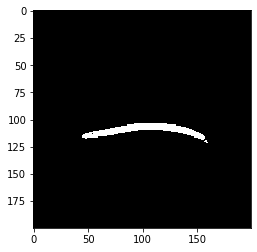

In [237]:
#Perform Image thresholding segmenatation 

gray = abies_G[4]
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] < gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')


In [34]:
#Do image thresholding on mass scale 
# Temp list 
allClass = [acer_ginnala_G,acer_palmatum_G,acer_rubrum_G,asimina_triloba_G,abies_G]
#y = len(a)
#location for each class of leaf 
y = 0
for x in allClass:
    #z = len(a[y])
    #location for inner images within class of leaf 
    z = len(allClass[y])
    x = 0 #track how many loops 
    while x < z:
        gray = allClass[y][x]
        gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
        for i in range(gray_r.shape[0]):
            if gray_r[i] < gray_r.mean():
                gray_r[i] = 1
            else:
                gray_r[i] = 0 
        gray = gray_r.reshape(gray.shape[0],gray.shape[1])
        #y = rgb2gray(acer_rubrum_G[x])
        #acer_rubrum_G[x] = y
        x = x+1
    
    y = y + 1 #go up by 1 and go to next class 
   # print(z)


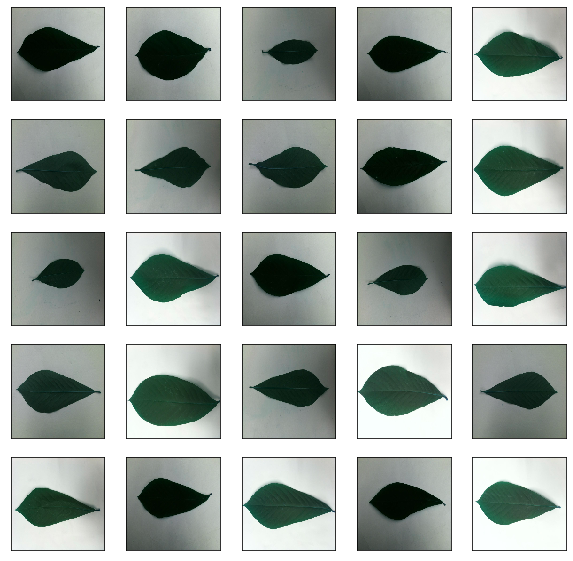

In [41]:
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(asimina_triloba[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

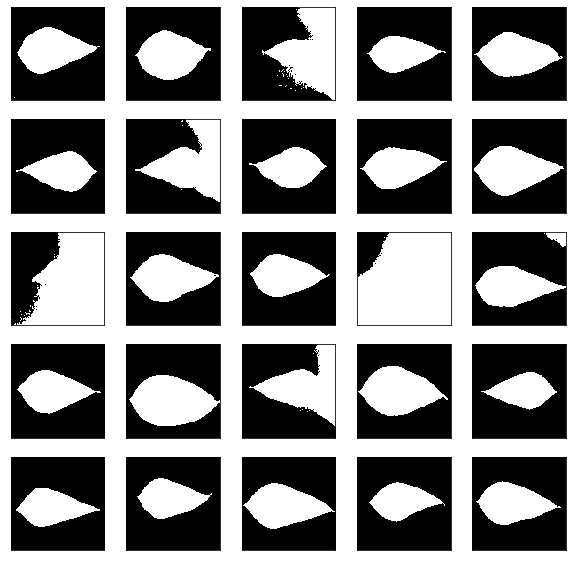

In [42]:
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(asimina_triloba_G[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

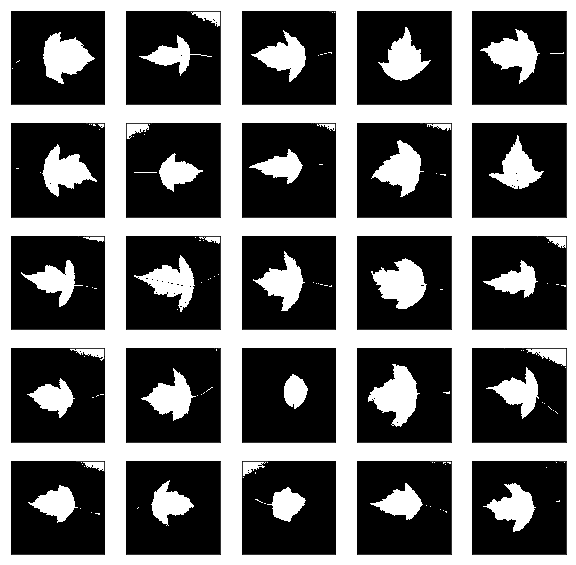

In [40]:
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(acer_ginnala_G[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

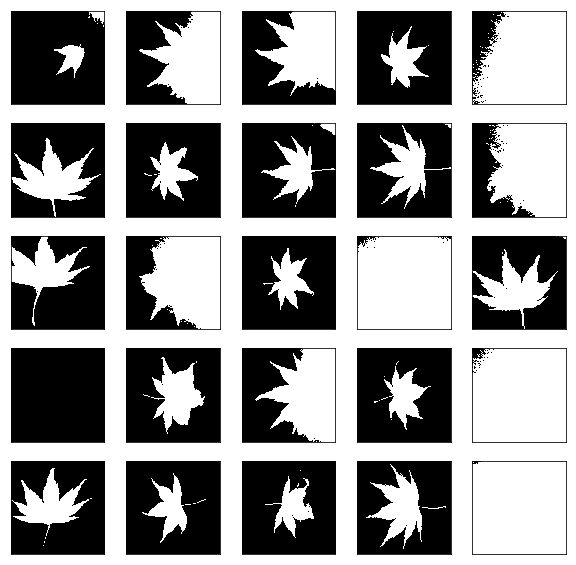

In [21]:
#acer_palmatum_G
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(acer_palmatum_G[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

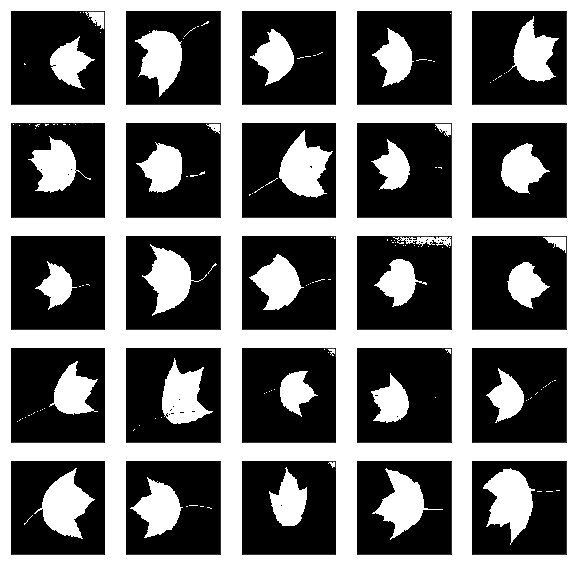

In [22]:
#acer_rubrum_G
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(acer_rubrum_G[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

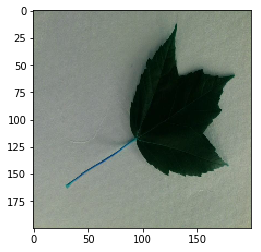

In [41]:
plt.imshow(acer_rubrum[4])

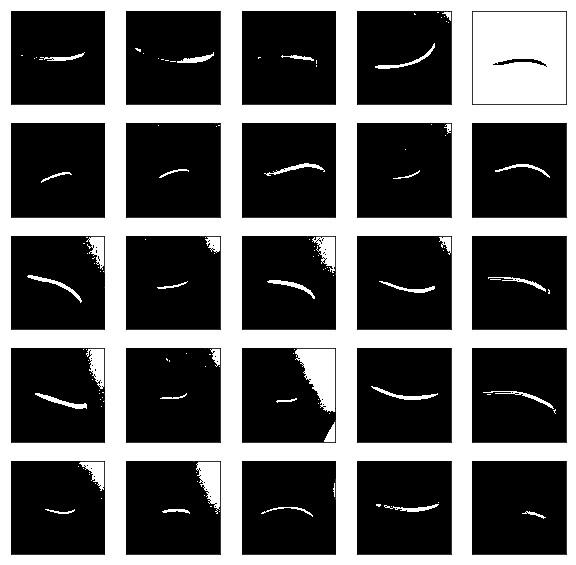

In [24]:
#abies_G
#display all images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(abies_G[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])

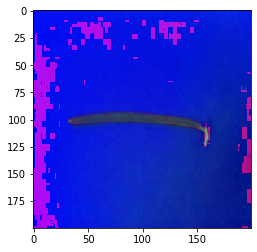

In [288]:
### Lets take a look at color segmenting now 
#acer_ginnala
#acer_palmatum
#acer_rubrum
#asimina_triloba
#abies
hsv_try = cv2.cvtColor(abies[2], cv2.COLOR_RGB2HSV)

plt.imshow(hsv_try)
plt.show()


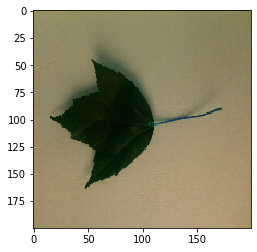

In [201]:
plt.imshow(acer_rubrum[2])




In [289]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(hsv_try)
#fig = plt.figure()
#axis = fig.add_subplot(1, 1, 1, projection="3d")


pixel_colors = hsv_try.reshape((np.shape(hsv_try)[0]*np.shape(hsv_try)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()



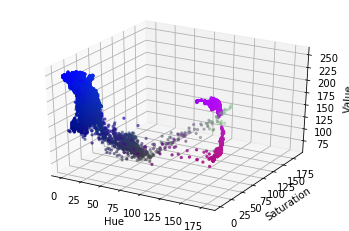

In [290]:
#Create a 3d figure of the color space that we are going to focus on 
h, s, v = cv2.split(hsv_try)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [47]:
#acer_try = np.copy(acer_palmatum[6])

#acer_try = cv2.cvtColor(acer_palmatum[5], cv2.COLOR_BGR2RGB)

In [291]:
light_green = (100, 255, 130) #going for lime green 
dark_green = (20, 50, 0) #darkish leafy green 



In [292]:
from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_green, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) / 255.0



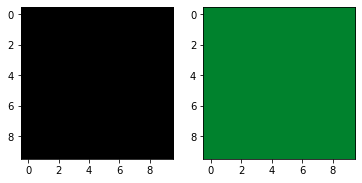

In [293]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [294]:
#Now we need to capture the range of green values within the image to segment the leaf 
#Going to go for a light green to a dark green 

#light_green = (0, 255, 0) #going for lime green 
#dark_green = (0, 128, 0) #darkish leafy green 

mask = cv2.inRange(hsv_try, dark_green, light_green)
result = cv2.bitwise_and(abies[2],abies[2], mask=mask)



In [628]:
#mask
hsv_try




array([[[ 64,   8, 244],
        [ 64,   8, 244],
        [ 64,   8, 245],
        ...,
        [ 37,  11, 206],
        [ 43,  11, 203],
        [ 51,  12, 205]],

       [[ 65,   6, 243],
        [ 65,   6, 243],
        [ 65,   6, 244],
        ...,
        [ 35,   8, 203],
        [ 45,   8, 202],
        [ 55,   8, 202]],

       [[ 70,   3, 242],
        [ 70,   3, 242],
        [ 70,   3, 243],
        ...,
        [ 35,   8, 203],
        [ 45,   8, 199],
        [ 60,   8, 192]],

       ...,

       [[ 85,   6, 254],
        [ 85,   6, 254],
        [ 85,   6, 254],
        ...,
        [ 90,  13, 237],
        [ 90,  13, 237],
        [ 90,  13, 236]],

       [[ 85,   6, 253],
        [ 85,   6, 254],
        [ 85,   6, 254],
        ...,
        [ 85,  12, 237],
        [ 86,  15, 238],
        [ 86,  15, 236]],

       [[ 85,   6, 254],
        [ 85,   6, 253],
        [ 85,   6, 254],
        ...,
        [ 85,  12, 237],
        [ 85,  14, 237],
        [ 86,  15, 236]]

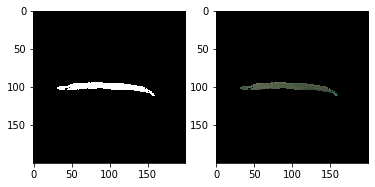

In [295]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
# got our image segmented by color 

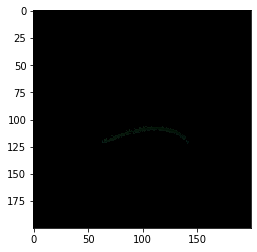

In [179]:
plt.imshow(hold_abies[45])

In [296]:
#set these for the classes 
#light_green = (130, 255, 60) #going for lime green 
#dark_green = (40, 80, 20) #darkish leafy green 
#light_green = (120, 255, 100) #going for lime green 
#dark_green = (40, 80, 0) #darkish leafy green 


allClassColor = [acer_ginnala,acer_palmatum,acer_rubrum,asimina_triloba,abies]
#for 

#double loop that will process each leaf within the class and set leaf segmenent as new image within classes. 
y = 0
for x in allClassColor:
    #z = len(a[y])
    #location for inner images within class of leaf 
    z = len(allClassColor[y]) #grab length of each class 
    x = 0 #track how many loops 
    while x < z:
        hsv_try = cv2.cvtColor(allClassColor[y][x], cv2.COLOR_RGB2HSV) #Convert image to HSV 
        mask = cv2.inRange(hsv_try, dark_green, light_green)
        result = cv2.bitwise_and(allClassColor[y][x],allClassColor[y][x], mask=mask)
        allClassColor[y][x] = result #set result = to what we just processed
        x = x+1
    
    y = y + 1 #go up by 1 and go to next class    



In [299]:
#hold_asimina_triloba = np.copy(asimina_triloba) #hold color values 
#hold_acer_ginnala = np.copy(acer_ginnala) #hold color values 
hold_abies = np.copy(abies)
#hold_acer_palmatum = np.copy(acer_palmatum)
#hold_acer_rubrum = np.copy(acer_rubrum)

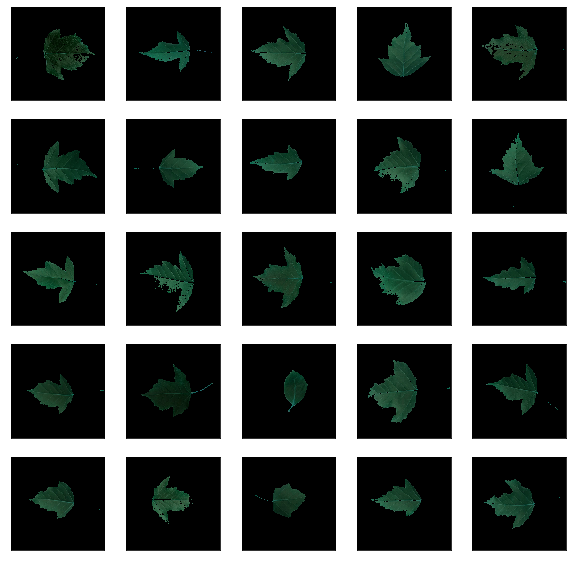

In [311]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hold_acer_ginnala[i], cmap='gray')
    #plt.xlabel(class_names[train_labels[i]])
    #acer_ginnala
#acer_palmatum
#acer_rubrum
#asimina_triloba
#abies

In [55]:
### Due to arrary issue, just create a train test split for each dataset 
binarySet = np.concatenate((acer_ginnala_G, acer_palmatum_G,acer_rubrum_G,asimina_triloba_G,abies_G), axis=0)

#ginnala = 0 
#palmatum = 1
#rubrum = 2 
#abies = 3
#tribola = 4




In [221]:
Colorset = np.concatenate((hold_acer_ginnala, hold_acer_palmatum,hold_acer_rubrum,hold_asimina_triloba,hold_abies), axis=0)

In [222]:
Colorset.shape

(268, 200, 200, 3)

In [88]:
#Split Binary Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(binarySet, labels, test_size=0.33, random_state=42)
 #Shuffle data set as well 

In [300]:
#Split Color Test Set 
from sklearn.model_selection import train_test_split
C_train, C_test, CY_train, CY_test = train_test_split(Colorset, labels, test_size=0.33, random_state=42)


In [73]:
C_train.shape #Check shapes 
#X_train.shape #Check Shapes 
#X_test.shape






(179, 200, 200, 3)

In [61]:
#now that we have our data in testing and train and split and randomized we can begin buliding our CONV network 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D



Using TensorFlow backend.


In [89]:
#reshape binary dataset for conv network 
X_train = X_train.reshape(179,200,200,1)
X_test = X_test.reshape(89,200,200,1)


In [91]:
#set number of classes = 5 
num_classes = 5
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [96]:
y_train






array([[4],
       [2],
       [2],
       [3],
       [4],
       [2],
       [1],
       [0],
       [1],
       [3],
       [3],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3],
       [1],
       [1],
       [0],
       [4],
       [3],
       [4],
       [1],
       [1],
       [0],
       [1],
       [2],
       [3],
       [3],
       [1],
       [2],
       [1],
       [1],
       [4],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [1],
       [2],
       [3],
       [1],
       [3],
       [3],
       [2],
       [0],
       [4],
       [3],
       [0],
       [4],
       [1],
       [3],
       [3],
       [1],
       [1],
       [1],
       [3],
       [2],
       [0],
       [4],
       [4],
       [0],
       [3],
       [0],
       [1],
       [1],
       [3],
       [4],
       [2],
       [1],
       [2],
       [2],
       [4],
       [3],
       [1],
       [4],
       [1],
       [1],
       [3],
    

In [93]:
#Set up the intial model build

model = Sequential()
model.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=(200,200,1)))
model.add(Conv2D(64, (9, 9), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


In [97]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])



In [84]:
import time 

In [306]:
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])
# fit model & track run time model 3
start = time.time() 
history5 = model5.fit(X_train,y_train,batch_size=10,epochs=5,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 


Epoch 1/5
179/179 [==============================] - 10s 58ms/step - loss: 0.2592 - acc: 0.9218
Epoch 2/5
179/179 [==============================] - 7s 40ms/step - loss: 0.2788 - acc: 0.9385
Epoch 3/5
179/179 [==============================] - 7s 41ms/step - loss: 0.2186 - acc: 0.9441
Epoch 4/5
179/179 [==============================] - 7s 41ms/step - loss: 0.2070 - acc: 0.9330
Epoch 5/5
179/179 [==============================] - 7s 42ms/step - loss: 0.1219 - acc: 0.9665
> Compilation Time :  40.117244243621826


In [309]:
test_loss, test_acc = model5.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
#Got 85.39 % on the testing data set, not too bad 



89/89 [==============================] - 0s 3ms/step
Test accuracy: 0.77528090222498


In [98]:
#model.fit(X_train, y_train,batch_size=15,verbose = 1, epochs=5)

#obtained a 97% classfication rate on the training set very good, expected with the binary images

# fit model & track run time
start = time.time() 
history = model.fit(X_train,y_train,batch_size=15,epochs=10,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 




Epoch 1/10
179/179 [==============================] - 123s 686ms/step - loss: 2.1874 - acc: 0.4804
Epoch 2/10
179/179 [==============================] - 113s 632ms/step - loss: 0.6116 - acc: 0.7933
Epoch 3/10
179/179 [==============================] - 113s 632ms/step - loss: 0.2348 - acc: 0.9274
Epoch 4/10
179/179 [==============================] - 126s 704ms/step - loss: 0.1378 - acc: 0.9721
Epoch 5/10
179/179 [==============================] - 114s 639ms/step - loss: 0.0570 - acc: 0.9721
Epoch 6/10
179/179 [==============================] - 111s 619ms/step - loss: 0.0644 - acc: 0.9777
Epoch 7/10
179/179 [==============================] - 111s 617ms/step - loss: 0.0495 - acc: 0.9888
Epoch 8/10
179/179 [==============================] - 113s 631ms/step - loss: 0.0705 - acc: 0.9721
Epoch 9/10
179/179 [==============================] - 115s 644ms/step - loss: 0.0484 - acc: 0.9832
Epoch 10/10
179/179 [==============================] - 123s 686ms/step - loss: 0.0383 - acc: 0.9944
> Compila

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 192, 192, 32)      2624      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 184, 184, 64)      165952    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 92, 92, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 92, 92, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 541696)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               69337216  
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

In [102]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
#Got 85.39 % on the testing data set, not too bad 





89/89 [==============================] - 14s 161ms/step
Test accuracy: 0.8539325889576687


In [318]:
prediction = model.predict(X_test,verbose=1)

89/89 [==============================] - 15s 166ms/step


In [319]:
DFpredict = pd.DataFrame(prediction)

In [321]:
print(DFpredict)

DFpredict = pd.DataFrame(prediction)
DFpredict = DFpredict.reset_index()
#id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
DFpredict.columns = ('id','ginnala','palmatum','rubrum','abies','tribola')

DFpredict['id']=DFpredict['id']+1
DFpredict.to_csv('SZ_kaggle2.csv',index=False)

#ginnala = 0 
#palmatum = 1
#rubrum = 2 
#abies = 3
#tribola = 4



               0             1             2             3             4
0   2.168020e-03  8.639995e-01  1.312508e-01  1.012898e-03  1.568816e-03
1   2.789258e-07  2.371466e-06  8.539183e-04  9.991434e-01  2.058022e-08
2   9.078716e-01  3.631959e-03  2.703048e-02  5.621976e-02  5.246166e-03
3   9.829690e-01  4.514110e-03  1.228562e-02  2.290975e-04  2.173600e-06
4   6.910792e-06  9.999914e-01  1.730924e-06  1.705693e-10  7.086137e-11
..           ...           ...           ...           ...           ...
84  3.523646e-08  7.449575e-05  9.998951e-01  2.960070e-05  8.463198e-07
85  9.694574e-11  1.485723e-09  6.057242e-11  1.000000e+00  5.272878e-12
86  1.402539e-07  9.998705e-01  1.738741e-05  1.119781e-04  2.430307e-08
87  4.354061e-12  4.407304e-11  1.583177e-10  1.000000e+00  8.324640e-13
88  5.567663e-01  2.860286e-02  4.136374e-01  7.908349e-04  2.024553e-04

[89 rows x 5 columns]


In [324]:
DFpredict = pd.DataFrame(y_test)
DFpredict = DFpredict.reset_index()
#id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
DFpredict.columns = ('id',"null")

DFpredict['id']=DFpredict['id']+1
DFpredict.to_csv('SZ_kaggle3.csv',index=False)

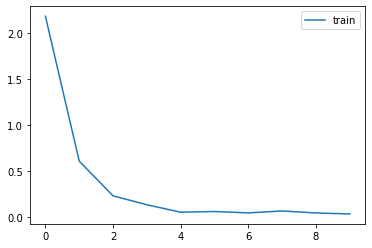

In [101]:
from matplotlib import pyplot
#This model scored .90 on Kaggle 
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()
#this model scored. 56!! on kaggle

In [104]:
#Set up the intial model build for color model 

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=(200,200,3)))
model2.add(Conv2D(64, (9, 9), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) #add 3rd conv layer to model 
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))
model2.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 192, 192, 32)      7808      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 184, 184, 64)      165952    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 92, 92, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 92, 92, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 45, 45, 64)        0         
__________

In [105]:
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])


In [108]:
# now lets do color images and see how it performs 
#model.fit(C_train, CY_train,batch_size=15,verbose = 1, epochs=5)
#model.summary()

# fit model & track run time
start = time.time() 
history2 = model2.fit(C_train,CY_train,batch_size=15,epochs=10,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 






Epoch 1/10
179/179 [==============================] - 117s 655ms/step - loss: 10.5887 - acc: 0.3128
Epoch 2/10
179/179 [==============================] - 111s 622ms/step - loss: 11.6105 - acc: 0.2793
Epoch 3/10
179/179 [==============================] - 111s 620ms/step - loss: 12.0686 - acc: 0.2514
Epoch 4/10
179/179 [==============================] - 110s 617ms/step - loss: 11.6158 - acc: 0.2793
Epoch 5/10
179/179 [==============================] - 111s 620ms/step - loss: 11.1656 - acc: 0.3073
Epoch 6/10
179/179 [==============================] - 110s 617ms/step - loss: 11.0756 - acc: 0.3128
Epoch 7/10
179/179 [==============================] - 111s 619ms/step - loss: 11.7061 - acc: 0.2682
Epoch 8/10
179/179 [==============================] - 111s 618ms/step - loss: 12.5687 - acc: 0.2179
Epoch 9/10
179/179 [==============================] - 112s 625ms/step - loss: 13.1466 - acc: 0.1844
Epoch 10/10
179/179 [==============================] - 111s 622ms/step - loss: 13.3267 - acc: 0.1732

In [109]:
test_loss, test_acc = model2.evaluate(C_test, CY_test)

print('Test accuracy:', test_acc)
##Got aorund 34% accuarcy, seems that color isnt doing as well as binary 
##Seemed to stall out at 34 % when running training set as well 

#worse score when adding second conv net 



89/89 [==============================] - 16s 179ms/step
Test accuracy: 0.19101123679220006


In [ ]:
# fit model & track run time
start = time.time() 
history = model.fit(train_X,train_y,batch_size=240,epochs=60,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 


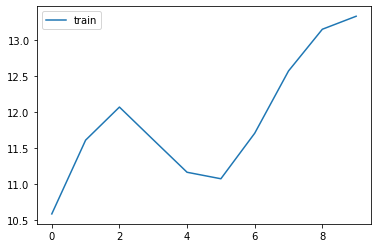

In [111]:
# plot history of training set of model with 300 nodes and 100 epochs , batch size 240 
# seems that around 65-75 epochs would of been best, after 80 model was jumping around with loss score 
#This model scored .90 on Kaggle 
pyplot.plot(history2.history['loss'], label='train')
pyplot.legend()
pyplot.show()
#this model scored. 56!! on kaggle

In [112]:
###Model 3 

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200,200,3)))
model3.add(Conv2D(64, (9, 9), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(5, activation='softmax'))
model3.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 190, 190, 64)      165952    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 95, 95, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 95, 95, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 95, 95, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 577600)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               73932928  
__________

In [113]:
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])


In [114]:
# fit model & track run time model 3
start = time.time() 
history3 = model3.fit(C_train,CY_train,batch_size=15,epochs=5,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 


Epoch 1/5
179/179 [==============================] - 131s 731ms/step - loss: 10.3259 - acc: 0.3296
Epoch 2/5
179/179 [==============================] - 124s 695ms/step - loss: 10.3552 - acc: 0.3575
Epoch 3/5
179/179 [==============================] - 123s 685ms/step - loss: 10.4452 - acc: 0.3520
Epoch 4/5
179/179 [==============================] - 124s 692ms/step - loss: 10.6253 - acc: 0.3408
Epoch 5/5
179/179 [==============================] - 121s 676ms/step - loss: 10.7195 - acc: 0.3296
> Compilation Time :  623.021733045578


In [115]:
test_loss, test_acc = model3.evaluate(C_test, CY_test)

print('Test accuracy:', test_acc)
###34 % 

89/89 [==============================] - 15s 171ms/step
Test accuracy: 0.3483146084158608


In [218]:
### Model 4 

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200,200,3)))
model4.add(Conv2D(64, (9, 9), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(5, activation='softmax'))
model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 190, 190, 64)      165952    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 95, 95, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 95, 95, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 95, 95, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 577600)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               73932928  
__________

In [219]:
model4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])


In [224]:
# fit model & track run time model 3
start = time.time() 
history4 = model4.fit(C_train,CY_train,batch_size=15,epochs=5,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 


Epoch 1/5
179/179 [==============================] - 121s 677ms/step - loss: 9.1632 - acc: 0.3966
Epoch 2/5
179/179 [==============================] - 122s 680ms/step - loss: 8.7615 - acc: 0.4469
Epoch 3/5
179/179 [==============================] - 121s 673ms/step - loss: 9.8041 - acc: 0.3855
Epoch 4/5
179/179 [==============================] - 121s 674ms/step - loss: 12.5827 - acc: 0.2123
Epoch 5/5
179/179 [==============================] - 121s 676ms/step - loss: 12.9191 - acc: 0.1899
> Compilation Time :  605.0528130531311


In [225]:
test_loss, test_acc = model4.evaluate(C_test, CY_test)

print('Test accuracy:', test_acc)
### Ran even worse when I actually segmented each leaf class by its indivdual color spaces ....

89/89 [==============================] - 16s 177ms/step
Test accuracy: 0.19101123679220006


In [314]:
### LAst attempt to get a better color accuary: Going simple model


model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200,200,3)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(5, activation='softmax'))
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 313632)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                20072512  
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 325       
Total para

In [315]:
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])
# fit model & track run time model 3
start = time.time() 
history5 = model5.fit(C_train,CY_train,batch_size=15,epochs=5,shuffle=False) #turn shuffle off so that we dont mess with date settings 
print("> Compilation Time : ", time.time() - start) #Gather time it took to complete the model 


Epoch 1/5
179/179 [==============================] - 10s 56ms/step - loss: 11.3923 - acc: 0.2067
Epoch 2/5
179/179 [==============================] - 6s 32ms/step - loss: 11.3464 - acc: 0.2849
Epoch 3/5
179/179 [==============================] - 6s 33ms/step - loss: 11.2305 - acc: 0.2961
Epoch 4/5
179/179 [==============================] - 6s 34ms/step - loss: 11.2912 - acc: 0.2905
Epoch 5/5
179/179 [==============================] - 6s 33ms/step - loss: 11.0990 - acc: 0.3017
> Compilation Time :  34.04663872718811


In [316]:
test_loss, test_acc = model5.evaluate(C_test, CY_test)

print('Test accuracy:', test_acc)
### best color model possible 

89/89 [==============================] - 1s 14ms/step
Test accuracy: 0.29213483229781806
